# Einführungsbeispiele NLP

Angelehnt an D. Sarkar: Text Analytics with Python (2nd Edition)

Ergänzt und aktualisiert von Heiko Rölke


In [1]:
import nltk
import spacy
import numpy as np
import pandas as pd

nlp = spacy.load('en_core_web_trf')

C:\Users\yhutter\AppData\Local\Temp\ipykernel_28680\2560818309.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\yhutter\GitRepos\fhgr-ta\code\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\yhutter\GitRepos\fhgr-ta\code\venv\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node inst

In [2]:
sentence = "The brown fox is quick and he is jumping over the lazy dog"
sentence

'The brown fox is quick and he is jumping over the lazy dog'

In [3]:
words = sentence.split()
np.random.shuffle(words)
print(words)

['quick', 'lazy', 'The', 'over', 'the', 'he', 'dog', 'jumping', 'fox', 'is', 'is', 'and', 'brown']


In [4]:
pos_tags = nltk.pos_tag(sentence.split())
pd.DataFrame(pos_tags).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN


In [5]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,DET,ADJ,NOUN,AUX,ADJ,CCONJ,PRON,AUX,VERB,ADP,DET,ADJ,NOUN


In [6]:
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}  
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}      
            VP: {<MD>?<VB.*>+}
          '''

pos_tagged_sent = nltk.pos_tag(sentence.split())
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))


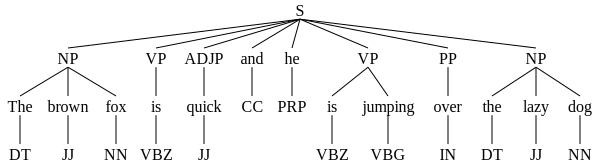

In [8]:
# visualize shallow parse tree
# !pip install svgling  # falls notwendig, zB im Browser...

shallow_parsed_sent

In [9]:
from spacy import displacy

displacy.render(nlp(sentence), jupyter=True, 
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})


In [10]:
spacy.explain("amod")

'adjectival modifier'

# Auf Deutsch geht es auch...

In [11]:
nlp = spacy.load("de_dep_news_trf")

In [12]:
satz = "Der braune Fuchs springt über den schlafenden Hund."

spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(satz)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8
0,Der,braune,Fuchs,springt,über,den,schlafenden,Hund,.
1,ART,ADJA,NN,VVFIN,APPR,ART,ADJA,NN,$.
2,DET,ADJ,NOUN,VERB,ADP,DET,ADJ,NOUN,PUNCT


In [13]:
cols = ["Wort", "Wortart", "Erklärung", "Wort-Tag", "Erklärung"]
rows = []
for token in nlp(satz):
    row = token.text, token.pos_, spacy.explain(token.pos_), token.tag_,  spacy.explain(token.tag_)
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Wort,Wortart,Erklärung,Wort-Tag,Erklärung
0,Der,DET,determiner,ART,definite or indefinite article
1,braune,ADJ,adjective,ADJA,"adjective, attributive"
2,Fuchs,NOUN,noun,NN,"noun, singular or mass"
3,springt,VERB,verb,VVFIN,"finite verb, full"
4,über,ADP,adposition,APPR,preposition; circumposition left
5,den,DET,determiner,ART,definite or indefinite article
6,schlafenden,ADJ,adjective,ADJA,"adjective, attributive"
7,Hund,NOUN,noun,NN,"noun, singular or mass"
8,.,PUNCT,punctuation,$.,sentence-final punctuation mark


In [14]:
spacy.displacy.render(nlp(satz), options={'distance': 100,'arrow_stroke': 1.5,'arrow_width': 8})

In [15]:
spacy.explain("nk")

'noun kernel element'

In [16]:
spacy.explain("sb")

'subject'